In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
df= pd.read_csv(r"C:\Users\warda\Downloads\Mall_Customers.csv")
#from sklearn.datasets import load_iris--for training

In [2]:
#l-->label; i-->number
df['Gender'] = df['Gender'].replace({l: i for i, l in enumerate(df['Gender'].unique())})

In [3]:
#deletion
df=df.drop(["CustomerID"],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
#building-->call
model=AgglomerativeClustering(n_clusters=5)

#fit
#model.fit(df)
df['clusters']=model.fit_predict(df)
df['clusters']

0      4
1      3
2      4
3      3
4      4
      ..
195    2
196    1
197    2
198    1
199    2
Name: clusters, Length: 200, dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

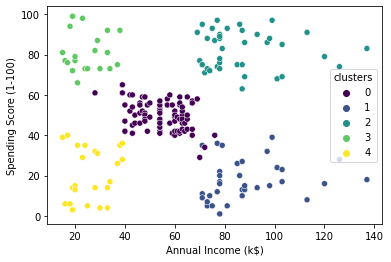

In [7]:
sns.scatterplot(data=df, x="Annual Income (k$)", y= "Spending Score (1-100)", hue="clusters",palette="viridis" )

In [12]:
#sns.scatterplot(data=df, y="Annual Income (k$)", x= "Age", hue="clusters", palette="Dark2")

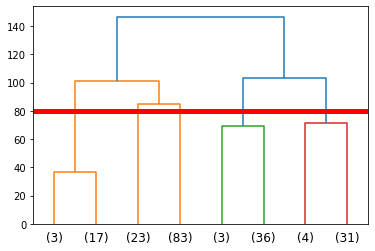

In [9]:
linkage = shc.linkage(df, method="complete")
dend = shc.dendrogram(linkage, truncate_mode="level", p=2)
plt.axhline(80,linewidth=5,color="r")
#levels seen verticaly
#shift+enter

In [10]:
shc.dendrogram

<function scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')>

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

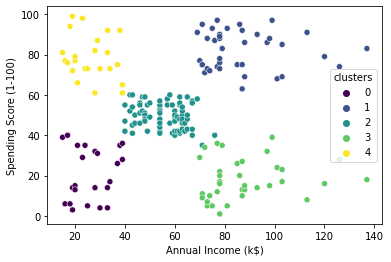

In [31]:
#KMEANSCLUSTERING
from sklearn.cluster import KMeans
df=df.drop("clusters",axis=1)
kmeans = KMeans(n_clusters=5, random_state=0)
df["clusters"]=kmeans.fit_predict(df)

sns.scatterplot(data=df, x="Annual Income (k$)", y= "Spending Score (1-100)", hue="clusters",palette="viridis" )

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   clusters                200 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

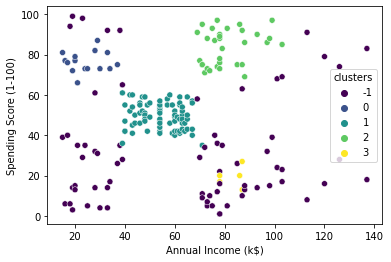

In [40]:
#DBSCANCLUSTERING
from sklearn.cluster import DBSCAN
df=df.drop("clusters",axis=1)
dbscan = DBSCAN(eps=10)
df["clusters"]=dbscan.fit_predict(df)

sns.scatterplot(data=df, x="Annual Income (k$)", y= "Spending Score (1-100)", hue="clusters",palette="viridis" )

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

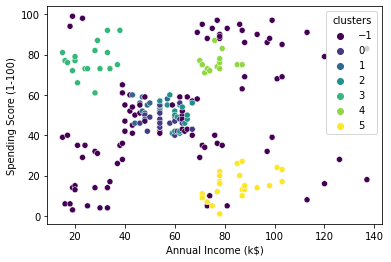

In [53]:
#OPTICSCLUSTERING
from sklearn.cluster import OPTICS
df=df.drop("clusters",axis=1)
optics = OPTICS(min_samples=10,max_eps=65)
df["clusters"]=optics.fit_predict(df)

sns.scatterplot(data=df, x="Annual Income (k$)", y= "Spending Score (1-100)", hue="clusters",palette="viridis" )

In [54]:
df["clusters"].value_counts()

-1    95
 5    23
 0    21
 2    19
 3    18
 4    14
 1    10
Name: clusters, dtype: int64